In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
from sklearn.feature_selection import SelectFromModel, RFECV

In [2]:
featurs=['Batt_name','cycle','voltage_battery','current_battery','temp_battery','current_load','voltage_load','time','Capacity']

In [3]:
test = pd.read_csv('discharge_onerow.csv')

In [4]:
test=test[featurs]
print(test.head())

  Batt_name  cycle  voltage_battery  current_battery  temp_battery  \
0     B0052      1         3.591996         0.000300     12.846963   
1     B0052      2         3.719151         0.000111      7.537816   
2     B0052      3         3.731411         0.000272      7.620107   
3     B0052      4         3.732101         0.000626      8.566306   
4     B0052      5         0.240892        -0.000988      5.106906   

   current_load  voltage_load      time  Capacity  
0        0.0002           0.0  1713.235  0.860659  
1        0.0004           0.0  3170.984  1.418310  
2        0.0004           0.0  3135.344  1.370712  
3        0.0004           0.0  3049.781  1.351565  
4        0.0002           0.0  4565.859       NaN  


In [5]:
X_train = test[(test.Batt_name =='B0005')| (test.Batt_name =='B0006') | (test.Batt_name =='B0007')|(test.Batt_name =='B0025')|(test.Batt_name =='B0026')|(test.Batt_name =='B0027')|(test.Batt_name =='B0028')]
#

In [6]:
print(X_train.head())

    Batt_name  cycle  voltage_battery  current_battery  temp_battery  \
100     B0028      1         2.615140        -1.994524     31.679728   
101     B0028      2         2.578716        -1.993679     31.425552   
102     B0028      3         2.679891        -1.992190     31.685802   
103     B0028      4         2.674601        -1.992421     31.837533   
104     B0028      5         2.655984        -1.991371     31.891977   

     current_load  voltage_load      time  Capacity  
100        1.9992         1.585  6515.422  1.804685  
101        1.9992         1.551  6516.219  1.804783  
102        1.9992         1.645  6489.500  1.797619  
103        1.9992         1.633  6471.250  1.792991  
104        1.9992         1.619  6466.672  1.791918  


In [7]:
train=X_train[(X_train['cycle']<=90)]
test=X_train[(X_train['cycle']>90)&(X_train['Batt_name']=="B0005")]
per=test
per2=test
per3=test

In [8]:
test.dtypes

Batt_name           object
cycle                int64
voltage_battery    float64
current_battery    float64
temp_battery       float64
current_load       float64
voltage_load       float64
time               float64
Capacity           float64
dtype: object

In [9]:
X_data_train=train.iloc[:,:-1].values
Y_data_train=train.iloc[:,8].values
X_data_test=test.iloc[:,:-1].values
Y_data_test=test.iloc[:,8].values
from sklearn.preprocessing import LabelEncoder
labelEconder=LabelEncoder()
X_data_train[:,0]=labelEconder.fit_transform(X_data_train[:,0])
X_data_test[:,0]=labelEconder.fit_transform(X_data_test[:,0])



#train.to_csv('trainData.csv')
#test.to_csv('testData.csv')

In [10]:
#print(X_data_test)

In [11]:
targ_train = train['Capacity']
fet_train=train[featurs]
targ_test=test['Capacity']
fet_test=test[featurs]

In [12]:
#print(targ_train)

In [13]:
print(fet_test.head())

    Batt_name  cycle  voltage_battery  current_battery  temp_battery  \
470     B0005     91         3.494045        -0.000743     36.763621   
471     B0005     92         3.510042        -0.001763     36.502306   
472     B0005     93         3.535925         0.001570     35.910172   
473     B0005     94         3.529351        -0.003970     35.878972   
474     B0005     95         3.541857        -0.001086     35.629228   

     current_load  voltage_load      time  Capacity  
470        0.0006           0.0  3082.937  1.563849  
471        0.0006           0.0  3074.266  1.548092  
472        0.0006           0.0  3066.000  1.532376  
473        0.0006           0.0  3056.437  1.526953  
474        0.0006           0.0  3048.219  1.516957  


In [14]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  # mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, r2_score
from sklearn.feature_selection import SelectFromModel, RFECV

<p><b>Linear Regression</b>: statistical method of analysis that estimates the relationship between one or more
independent variables and a dependent variable; the method estimates the relationship by minimizing
the sum of the squares in the difference between the observed and predicted values of the dependent
variable configured as a straight line or hyperplane</p>

In [15]:
linreg = linear_model.LinearRegression()
linreg.fit(X_data_train, Y_data_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
y_test_predict = linreg.predict(X_data_test)
y_train_predict = linreg.predict(X_data_train)

In [74]:
print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(Y_data_train, y_train_predict)), 
      (metrics.r2_score(Y_data_test, y_test_predict))))
linreg_metrics = get_regression_metrics('Linear Regression', Y_data_test, y_test_predict)
linreg_metrics



SS_Residual = sum((Y_data_test-y_test_predict)**2)
SS_Total = sum((Y_data_test-np.mean(Y_data_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_data_test)-1)/(len(Y_data_test)-X_data_test.shape[1]-1)
print("The R^2 is "+str(r_squared)+"   The Adjusted R^2 is "+str(adjusted_r_squared))
test=get_adj_R(Y_data_test,y_test_predict,X_data_test)
print(test)

R^2 training: 0.936, R^2 test: 0.931
The R^2 is 0.9314063563767458   The Adjusted R^2 is 0.9234534701595569
The R^2 is 0.9314063563767458   The Adjusted R^2 is 0.9234534701595569


In [20]:
print("Capacity_predict=======Actual value======difference")
for i in range(len(y_test_predict)):
    print(str(y_test_predict[i])+"     "+ str(Y_data_test[i]) +"    "+str(Y_data_test[i]-y_test_predict[i]))

Capacity_predict=======Actual value======difference
1.562805080532677     1.56384914    0.0010440594673231107
1.552746727831787     1.54809152    -0.004655207831786967
1.5372293814338185     1.53237556    -0.004853821433818517
1.5338721436039688     1.52695283    -0.006919313603968913
1.5253085991401925     1.5169573    -0.008351299140192392
1.5237094944246548     1.5118976    -0.0118118944246548
1.5185102256044312     1.5065639    -0.011946325604431207
1.5164258080770507     1.50154535    -0.01488045807705074
1.5064004212518642     1.49084441    -0.015556011251864232
1.503021958751388     1.48586838    -0.0171535787513879
1.4995672827462116     1.48041368    -0.019153602746211584
1.4960969583895283     1.47520959    -0.020887368389528316
1.5008215709975483     1.4859036    -0.014917970997548213
1.5073067741457074     1.49609183    -0.01121494414570745
1.499776767773009     1.48080059    -0.018976177773008862
1.4901004810301894     1.46975433    -0.02034615103018944
1.4828272897816146 

In [21]:

per['perd']=y_test_predict
#for i in range(len(per)):
 #   per['Capacity'][i]=y_test_predict[i]


/home/khaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Discharge B0005')

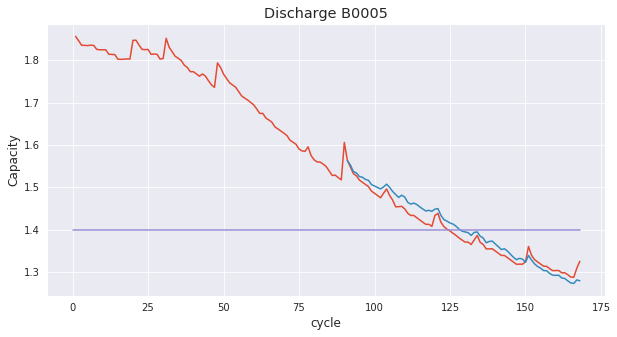

In [22]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = X_train.loc[(X_train['cycle']>=1)&(X_train['Batt_name']=="B0005"),['cycle','Capacity']]
plot_per=per.loc[per['cycle']>=90,['cycle','perd']]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['Capacity'])
plt.plot(plot_per['cycle'],plot_per['perd'])
#Draw threshold
plt.plot([0.,168], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

<p><b>Ridge Regression</b>: Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. By adding a degree of bias to the regression estimates, ridge regression reduces the
standard errors</p>

In [75]:
rdg = linear_model.Ridge(alpha=0.01)
rdg.fit(X_data_train, Y_data_train)

y_test_predict1 = rdg.predict(X_data_test)
y_train_predict = rdg.predict(X_data_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(Y_data_train, y_train_predict)), 
      (metrics.r2_score(Y_data_test, y_test_predict1))))

rdg_metrics = get_regression_metrics('Ridge Regression', Y_data_test, y_test_predict1)
rdg_metrics

test=get_adj_R(Y_data_test,y_test_predict1,X_data_test)
print(test)

R^2 training: 0.841, R^2 test: 0.932
The R^2 is 0.9315566157485528   The Adjusted R^2 is 0.9236211509078053


In [24]:

per2['perd']=y_test_predict1
#for i in range(len(per)):
 #   per['Capacity'][i]=y_test_predict[i]



/home/khaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Discharge B0005')

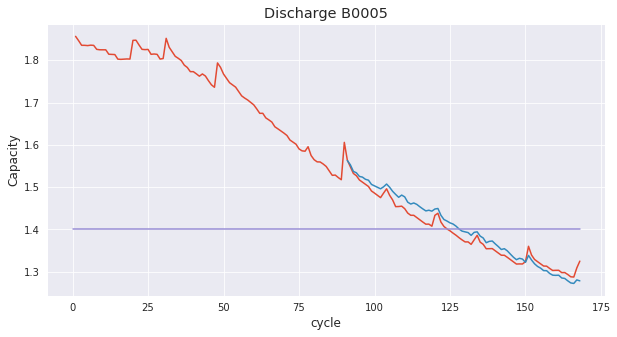

In [25]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = X_train.loc[(X_train['cycle']>=1)&(X_train['Batt_name']=="B0005"),['cycle','Capacity']]
plot_per=per2.loc[per2['cycle']>=90,['cycle','perd']]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['Capacity'])
plt.plot(plot_per['cycle'],plot_per['perd'])
#Draw threshold
plt.plot([0.,168], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [26]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [72]:
def get_adj_R(ytest,ypre,xtest):
    SS_Residual = sum((ytest-ypre)**2)
    SS_Total = sum((ytest-np.mean(ytest))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)
    return("The R^2 is "+str(r_squared)+"   The Adjusted R^2 is "+str(adjusted_r_squared))

<p><b>Polynomial Regression</b>: is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x</p>

In [79]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_data_train)
X_test_poly = poly.fit_transform(X_data_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, Y_data_train)

y_test_predict2 = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(Y_data_train, y_train_predict)), 
      (metrics.r2_score(Y_data_test, y_test_predict2))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', Y_data_test, y_test_predict2)
polyreg_metrics
test=get_adj_R(Y_data_test,y_test_predict2,X_data_test)
print(test)

R^2 training: 0.936, R^2 test: 0.863
The R^2 is 0.8634508556407592   The Adjusted R^2 is 0.8476190707875139


In [28]:


per3['perd']=y_test_predict2
#for i in range(len(per)):
 #   per['Capacity'][i]=y_test_predict[i]


/home/khaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Discharge B0005')

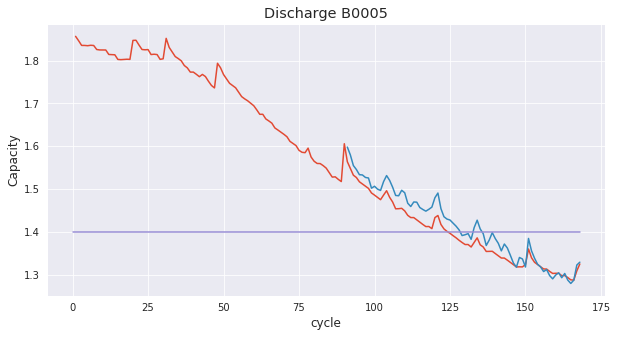

In [29]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = X_train.loc[(X_train['cycle']>=1)&(X_train['Batt_name']=="B0005"),['cycle','Capacity']]
plot_per=per3.loc[per3['cycle']>=90,['cycle','perd']]
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['Capacity'])
plt.plot(plot_per['cycle'],plot_per['perd'])
#Draw threshold
plt.plot([0.,168], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [59]:
import statsmodels.formula.api as sm

In [60]:
#xp_opt=X_data_train[:,[0,1,2,3,4,5,6]]


In [71]:
#print(xp_opt)

In [70]:
#reg=sm.OLS(endog=Y_data_train,exog=xp_opt).fit()

